In [34]:
import pymc3 as pm
import matplotlib.pyplot as plt
import seaborn as sns


In [130]:
def foo(n, k_observed, alpha, beta):
    model = pm.Model()
    with model:
        theta = pm.Beta('theta', alpha = alpha, beta = beta)
        k = pm.Binomial('k', n = n, p = theta, observed = k_observed)
        trace = pm.sample(10000)
        model_map = pm.find_MAP(model = model)['theta']
        post_pred = pm.sample_ppc(trace, samples = 1)
    return trace, model_map, post_pred

trace_1_1, model_map_1_1, post_pred_1_1 = foo(6, 6, 1, 1)
trace_50_50, model_map_50_50, post_pred_50_50 = foo(6, 6, 50, 50)
trace_20_20, model_map_20_20, post_pred_20_20 = foo(6, 6, 20, 20)
trace_3_3, model_map_3_3, post_pred_3_3 = foo(6, 6, 3, 3)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:04<00:00, 2320.54it/s]
logp = -0.0023631, ||grad|| = 0.0023627: 100%|██████████| 20/20 [00:00<00:00, 2465.50it/s]  
100%|██████████| 1/1 [00:00<00:00, 1859.18it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:04<00:00, 2392.75it/s]
logp = -2.0846, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1585.65it/s]
100%|██████████| 1/1 [00:00<00:00, 1988.76it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:04<00:00, 2338.72it/s]
logp = -2.5465, ||grad|| = 3: 100%|██████████| 6/6 [00:00<00:00, 1763.67it/s]
100%|██████████| 1/1 [00:00<00:00, 2421.65it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 10500/10500 [00:04<00:00, 2461.04it/s]
logp = -3.5303, ||grad|| = 3: 100%|██████████| 7/7 [00:00<00:00, 1865.20it/s]
1

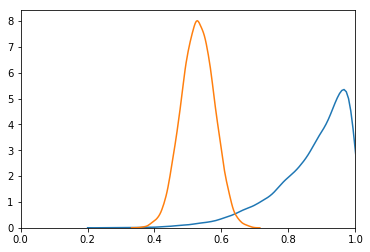

In [131]:
ax = sns.kdeplot(trace_1_1['theta'])
ax.set_xlim([0, 1])

ax = sns.kdeplot(trace_50_50['theta'])
ax.set_xlim([0, 1])

plt.show()


In [132]:
print model_map_1_1
print model_map_50_50
print pm.df_summary(trace_1_1)['mean']['theta']
print pm.df_summary(trace_50_50)['mean']['theta']


0.999998462083
0.528846153741
0.871172382001
0.529183254178


In [133]:
print post_pred_1_1
print post_pred_50_50

{'k': array([4])}
{'k': array([4])}
